# Sect 15-16: Hypothesis Testing with Neuro Data 

- ANOVA & AB Testing

- 07/01/20

- online-ds-pt-041320

## Learning Objectives

- Discuss A/B Testing/Experimental Design using my neuroscience research data.
- Discuss the multiple comparison problem.
- Discuss ANOVA
- 

## NOTES

- This notebook is intended to walk through preparing my binge drinking data for Hypothesis Testing
- Specifically, in this notebook I will attempt to use the most appropriate stat tests, which are not taught in the Learn curriculum


- **Repeated Measures ANOVA in Python**
-  **Two way RM ANOVA**

# REFERENCES


- Hypothesis Testing Workflow:
    - https://github.com/jirvingphd/hypothesis_testing_workflow_python

- **Two-Way and RM ANOVA Resources**
    - [RM ANOVA IN Python with Statsmodels](https://www.marsja.se/repeated-measures-anova-in-python-using-statsmodels/)
    - One-way RM ANOVA (other packages): https://www.marsja.se/repeated-measures-anova-using-python/
    - Two-Way: https://marsja.se/two-way-anova-repeated-measures-using-python/


## HYPOTHESIS TESTING STEPS

- Separate data in group vars.
- Visualize data and calculate group n (size)

    
* Select the appropriate test based on type of comparison being made, the number of groups, the type of data.


- For t-tests: test for the assumptions of normality and homogeneity of variance.

    1. Check if sample sizes allow us to ignore assumptions, and if not:
    2. **Test Assumption Normality**

    3. **Test for Homogeneity of Variance**

    4. **Choose appropriate test based upon the above** 
    
    
* **Perform chosen statistical test, calculate effect size, and any post-hoc tests.**
    - To perform post-hoc pairwise comparison testing
    - Effect size calculation
        - Cohen's d

## Statistical Tests Summary Table



| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | 1-sample t test |`scipy.stats.ttest_1samp()`|  1-sample Wilcoxon |`scipy.stats.wilcoxon`|
 | 2-sample t test |`scipy.stats.ttest_ind()` | Mann-Whitney U test |`scipy.stats.mannwhitneyu()` |
 | One-Way ANOVA | `scipy.stats.f_oneway()` | Kruskal-Wallis | `scipy.stats.kruskal` | 
 
 
 | Factorial DOE with one factor and one blocking variable |Friedman test  |


# Real-World Science / Experimental Design

> ## The Role of Stress Neurons in the Amygdala in Addiction/Binge Drinking

- We will be talking through some of the experiments from my Postdoctoral research on the roll of stress neurons in the escalation of binge drinking.
- [James' Neuroscience Research Poster: Society for Neuroscience 2016](https://drive.google.com/open?id=14z2dUdPB_8ei3HA7R1j3ylwEP0kVZhJq)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">



#### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

## Hypothesis 

- Based on prior evidence in the field, stress neurons in the amygdala are believed to be responsible for the negative emotions that promote binge consumption to relieve negative symptoms

$ H_1$: Increasing the activity of stress neurons (CRF neurons) in the amygdala will increase the amount of alcohol consumed by binge-drinking mice.

$H_0$: Stimulation of CRF neurons has no effect on the amount of alcohol consumed.

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_preds1.png" width=60%>

## Experimental Design

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/opto_6steps.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1_no_mouse.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1.png">--->

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

## Hypothesis Testing: Mouse Data

### Hypothesis
> Question: does stimulation of CRF Neurons in the central amygdala increase alcohol consumption?

- Metric:
- Groups:


- $H_1$: 

- $H_0$: 

$\alpha$=0.05


### Step 1: which type of test?

- What type of data?
    -  Numerical (# of licks)
- How many groups?
    -  Control vs Experimental
    - Training Phases (BL,S,PS,R)

#### Let's First Try to Treat this as 2-sample T-Tests (one for each phase)

In [8]:
!pip install -U fsds
from fsds.imports import *

Requirement already up-to-date: fsds in /anaconda3/envs/learn-env/lib/python3.6/site-packages (0.2.15)


In [9]:
plt.style.use('seaborn-notebook')
pd.set_option('display.max_columns',0)
pd.set_option('display.precision',3)

# Obtaining/Preprocessing Data

In [6]:
import os
print(os.getcwd())
os.listdir('../../datasets/')

/Users/jamesirving/Documents/GitHub/_STUDY GROUP PREP/online-dtsc-pt-041320-cohort-notes/Instructor Notebooks/sect_15+16


['probability_playlists',
 '.DS_Store',
 'old_town_road.json',
 'example_json.json',
 'Northwind_ERD_updated.png',
 'Northwind_small.sqlite',
 '.ipynb_checkpoints',
 'mouse_drinking_data_melted.csv',
 'mouse_drinking_data_cleaned.csv',
 'SQL']

In [7]:
df = pd.read_csv("../../datasets/mouse_drinking_data_cleaned.csv")#,index_col=0)
df.drop('Sex',inplace=True,axis=1)
df 

,Mouse_ID,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
0,1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,5,Experimental,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
5,6,Experimental,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
6,7,Experimental,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
7,8,Experimental,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
8,9,Experimental,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578
9,10,Experimental,953,988,579,706,1106,812,902,835,829,801,1011,919,274,559,840,890,724,793,559,700


#### Laying Out Our Approach

1. Make a **dict/lists of the column names** that should be **averaged together** (`col_dict`)

2. Make a new df of means using `col_dict`

3. Make a grp dict using  `df_means.groupby('Group').groups` 

- Visualize the two populations

- Prepare for hypothesis tests
    - Either use `grps` dict to reference the correct columsn to pass into tests

<!---
**Variables:**

- `col_dict` (dict): dict of column names to be grouped together for means
- `df_means` (df): df of col_dict column means.
- `grps` (dict): groupby dict where keys = 'Group' column and values = row indices

- `data` (dict): Dictionary of...
    - Series of each phase by group? --->

In [5]:
## Loop through the differnet phases of the experiment
phases = ['BL','S','PS','R1','R2']

## save corresponding column names as values 
col_dict = {}
for phase in phases:
    col_dict[phase] = [col for col in df.columns if col.startswith(phase) ]
col_dict    

{'BL': ['BL1', 'BL2', 'BL3', 'BL4'],
 'S': ['S1', 'S2', 'S3', 'S4'],
 'PS': ['PS1', 'PS2', 'PS3', 'PS4'],
 'R1': ['R1_1', 'R1_2', 'R1_3', 'R1_4'],
 'R2': ['R2_1', 'R2_2', 'R2_3', 'R2_4']}

In [10]:
## Get then opposite of col_dict
phase_dict = {}
for phase,colnames in col_dict.items():
    for col in colnames:
        phase_dict[col] = phase
phase_dict

{'BL1': 'BL',
 'BL2': 'BL',
 'BL3': 'BL',
 'BL4': 'BL',
 'S1': 'S',
 'S2': 'S',
 'S3': 'S',
 'S4': 'S',
 'PS1': 'PS',
 'PS2': 'PS',
 'PS3': 'PS',
 'PS4': 'PS',
 'R1_1': 'R1',
 'R1_2': 'R1',
 'R1_3': 'R1',
 'R1_4': 'R1',
 'R2_1': 'R2',
 'R2_2': 'R2',
 'R2_3': 'R2',
 'R2_4': 'R2'}

### Calculating individual mouse means by phase

In [16]:
cols = col_dict['BL']
df[cols].mean(axis=1)

0     697.00
1     781.00
2     658.25
3     863.50
4     576.25
5     639.25
6     795.75
7     559.50
8     706.25
9     806.50
10    645.25
11    549.00
12    602.00
13    732.50
14    618.00
15    477.25
16    316.00
17    807.50
18    540.25
19    282.75
20    408.25
21    211.00
dtype: float64

In [13]:
df_means = df[['Mouse_ID','Group']].copy()
df_means

,Mouse_ID,Group
0,1,Control
1,2,Control
2,3,Control
3,4,Control
4,5,Experimental
5,6,Experimental
6,7,Experimental
7,8,Experimental
8,9,Experimental
9,10,Experimental


In [17]:
## Calculated the means by phase
df_means = df[['Mouse_ID','Group']].copy()

for phase, cols in col_dict.items():
    df_means[phase] = df[cols].mean(axis=1)
df_means

,Mouse_ID,Group,BL,S,PS,R1,R2
0,1,Control,697.00,703.50,645.25,289.50,578.75
1,2,Control,781.00,808.75,655.75,356.75,803.25
2,3,Control,658.25,788.00,864.50,443.75,686.00
3,4,Control,863.50,671.50,704.25,402.25,663.25
4,5,Experimental,576.25,605.50,603.00,619.75,715.75
5,6,Experimental,639.25,513.25,618.50,808.75,817.50
6,7,Experimental,795.75,815.25,645.75,588.00,867.00
7,8,Experimental,559.50,524.00,525.25,106.00,190.00
8,9,Experimental,706.25,695.50,547.75,268.75,510.25
9,10,Experimental,806.50,913.75,890.00,640.75,694.00


In [ ]:
df

### Getting Group Data For EDA & Testing

In [18]:
## Get grps 
data = {}

## Two different ways of using groupby
grps = df_means.groupby('Group').groups

## For each group
for grp in grps:
    
    ## Save the group df as grp name 
    data[grp] = df_means.groupby('Group').get_group(grp)
    
    # Display data
    display(data[grp].head().style.set_caption(grp))

,Mouse_ID,Group,BL,S,PS,R1,R2
0,1,Control,697.000,703.500,645.250,289.500,578.750
1,2,Control,781.000,808.750,655.750,356.750,803.250
2,3,Control,658.250,788.000,864.500,443.750,686.000
3,4,Control,863.500,671.500,704.250,402.250,663.250
11,12,Control,549.000,437.250,469.250,273.000,518.750


,Mouse_ID,Group,BL,S,PS,R1,R2
4,5,Experimental,576.250,605.500,603.000,619.750,715.750
5,6,Experimental,639.250,513.250,618.500,808.750,817.500
6,7,Experimental,795.750,815.250,645.750,588.000,867.000
7,8,Experimental,559.500,524.000,525.250,106.000,190.000
8,9,Experimental,706.250,695.500,547.750,268.750,510.250


In [19]:
data.keys()

dict_keys(['Control', 'Experimental'])

In [20]:
data['Control']

,Mouse_ID,Group,BL,S,PS,R1,R2
0,1,Control,697.00,703.50,645.25,289.50,578.75
1,2,Control,781.00,808.75,655.75,356.75,803.25
2,3,Control,658.25,788.00,864.50,443.75,686.00
3,4,Control,863.50,671.50,704.25,402.25,663.25
11,12,Control,549.00,437.25,469.25,273.00,518.75
12,13,Control,602.00,444.00,529.75,372.00,465.75
13,14,Control,732.50,518.25,629.25,467.50,636.50
14,15,Control,618.00,587.25,477.75,257.25,559.75
21,22,Control,211.00,285.25,197.50,67.75,219.75


### Plotting Group Means + Standard Error of the Mean

In [21]:
from scipy.stats import sem

## Create lists for saving x,y, and yerr
x = []
y = []
y_err = []

## Select a phase to visualize
phase = "BL"

# For each group
for group in data:
    
    ## grab the correct phasen col from group data
    grp_data = data[group][phase]
    
    ## Save x,y 
    x.append(group)
    y.append(grp_data.mean())
    
    ## Calc and save error
    y_err.append(sem(grp_data))
    

In [22]:
y_err

[61.91035434649556, 48.92460135102792]

<BarContainer object of 2 artists>

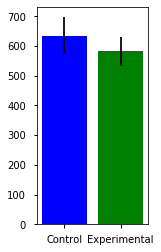

In [23]:
fig,ax = plt.subplots(figsize=(2,4))
plt.bar(x,y,yerr=y_err,color=['b','g'])


In [24]:
def plot_bars_yerr(data,phase = "BL"):
    """Plots the group means +/- standard error of the mean."""
    from scipy.stats import sem

    ## Save x,y, and yerr
    x = []
    y = []
    y_err = []
    
    for group in data:
        grp_data = data[group][phase]
        x.append(f"{group}")
        y.append(grp_data.mean())
        y_err.append(sem(grp_data))
        
    fig,ax = plt.subplots(figsize=(3,5))
    ax.bar(x,y,yerr=y_err,color=['k','b'])
    ax.set_title(f"Phase = {phase}")
    ax.set(ylabel='# of Licks')
    
    return fig,ax

### Run 2-sample T-Test on Baseline Days

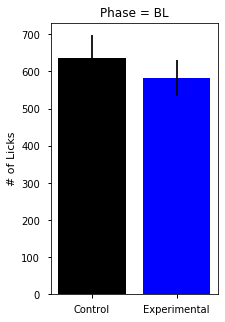

In [25]:
f,a = plot_bars_yerr(data,phase = "BL")

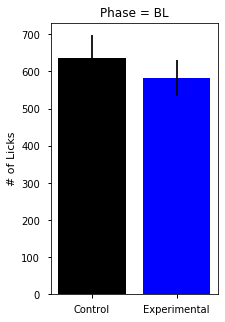

In [26]:
test_phase = "BL"
f,a = plot_bars_yerr(data,phase)

In [32]:
for grp in data:
    pass

for grp,grp_df in data.items():
    print(grp)
#     display(grp_df)
grp_df

Control
Experimental


,Mouse_ID,Group,BL,S,PS,R1,R2
4,5,Experimental,576.25,605.50,603.00,619.75,715.75
5,6,Experimental,639.25,513.25,618.50,808.75,817.50
6,7,Experimental,795.75,815.25,645.75,588.00,867.00
7,8,Experimental,559.50,524.00,525.25,106.00,190.00
8,9,Experimental,706.25,695.50,547.75,268.75,510.25
9,10,Experimental,806.50,913.75,890.00,640.75,694.00
10,11,Experimental,645.25,723.75,686.25,623.00,702.25
15,16,Experimental,477.25,587.25,788.75,647.25,1082.75
16,17,Experimental,316.00,519.25,502.50,582.75,591.50
17,18,Experimental,807.50,694.00,747.25,780.50,806.00


In [34]:
import scipy.stats as st
test_phase = 'BL'
## Make list of list of headers
results = [['Group','n','Normaltest Stat','p','sig?']]

## Make an empty list for our group data
test_equal_var = []

## Loop through the data dictionary 
for grp,grp_df in data.items():
   
    ## Grab the correct phase column from the group df
    grp_data = grp_df[test_phase].copy()
    ## Append group data to list of group data
    test_equal_var.append(grp_data)
    
    ## Test for nomrality and save result 
    stat,p = st.normaltest(grp_data)
    results.append([grp,len(grp_data),stat,p,p<.05])
results

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



[['Group', 'n', 'Normaltest Stat', 'p', 'sig?'],
 ['Control', 9, 8.254723372420806, 0.016125366526865192, True],
 ['Experimental', 13, 0.7897193225624515, 0.6737745892767993, False]]

In [35]:
pd.DataFrame(results[1:],columns=results[0])

,Group,n,Normaltest Stat,p,sig?
0,Control,9,8.255,0.016,True
1,Experimental,13,0.790,0.674,False


### Adding Levene's Test

In [ ]:
import scipy.stats as st

## Make list of list of headers
results = [['Group','n','Normaltest Stat','p','sig?']]

## Make an empty list for our group data
test_equal_var = []

## Loop through the data dictionary 
for grp,grp_df in data.items():
   
    ## Grab the correct phase column from the group df
    grp_data = grp_df[test_phase].copy()
    ## Append group data to list of group data
    test_equal_var.append(grp_data)
    
    ## Test for nomrality and save result 
    stat,p = st.normaltest(grp_data)
    results.append([grp,len(grp_data),stat,p,p<.05])


## Test for equal variance
stat, p = st.levene(*test_equal_var)
results.append(['Equal Variance','all',stat,p,p<.05])
    
results_df = pd.DataFrame(results[1:],columns=results[0])
results_df

### Run Correct Test

In [ ]:
st.mannwhitneyu(*test_equal_var)

In [36]:
## Functionize code for testing other phases
import scipy.stats as st
def test_assumptions(data,test_phase):#,plot=True):

    ## Make list of list of headers
    results = [['Phase','Group','n','Normaltest Stat','p','sig?']]

    ## Make an empty list for our group data
    test_equal_var = []

    ## Loop through the data dictionary 
    for grp,grp_df in data.items():

        ## Grab the correct phase column from the group df
        grp_data = grp_df[test_phase].copy()
        ## Append group data to list of group data
        test_equal_var.append(grp_data)

        ## Test for nomrality and save result 
        stat,p = st.normaltest(grp_data)
        results.append([test_phase,grp,len(grp_data),stat,p,p<.05])


    ## Test for equal variance
    stat, p = st.levene(*test_equal_var)
    results.append([test_phase,'Equal Variance','all',stat,p,p<.05])

    results_df = pd.DataFrame(results[1:],columns=results[0])
    return results_df

In [37]:
res_df=  test_assumptions(data,'S')
res_df

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,S,Control,9,0.490,0.783,False
1,S,Experimental,13,6.533,0.038,True
2,S,Equal Variance,all,0.072,0.791,False


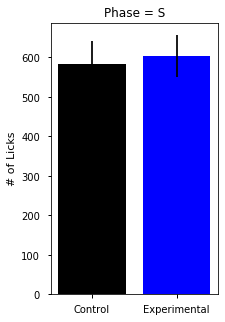

In [38]:
fig,ax = plot_bars_yerr(data,phase='S')

In [41]:
## Add Plotting to function
import scipy.stats as st
def test_assumptions(data,test_phase,plot=True):

    if plot:
        fig,ax = plot_bars_yerr(data,phase=test_phase)
        
    ## Make list of list of headers
    results = [['Phase','Group','n','Normaltest Stat','p','sig?']]

    ## Make an empty list for our group data
    test_equal_var = []

    ## Loop through the data dictionary 
    for grp,grp_df in data.items():

        ## Grab the correct phase column from the group df
        grp_data = grp_df[test_phase].copy()
        ## Append group data to list of group data
        test_equal_var.append(grp_data)

        ## Test for nomrality and save result 
        stat,p = st.normaltest(grp_data)
        results.append([test_phase,grp,len(grp_data),stat,p,p<.05])


    ## Test for equal variance
    stat, p = st.levene(*test_equal_var)
    results.append([test_phase,'Equal Variance','all',stat,p,p<.05])

    results_df = pd.DataFrame(results[1:],columns=results[0])
    return results_df

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,BL,Control,9,8.255,0.016,True
1,BL,Experimental,13,0.790,0.674,False
2,BL,Equal Variance,all,0.131,0.721,False


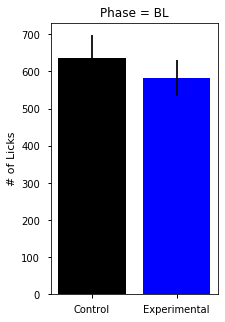

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,S,Control,9,0.490,0.783,False
1,S,Experimental,13,6.533,0.038,True
2,S,Equal Variance,all,0.072,0.791,False


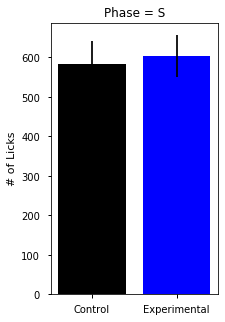

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,PS,Control,9,2.276,0.321,False
1,PS,Experimental,13,3.780,0.151,False
2,PS,Equal Variance,all,0.052,0.822,False


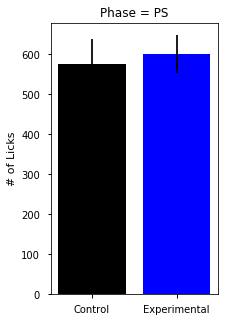

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,R1,Control,9,3.932,0.140,False
1,R1,Experimental,13,3.078,0.215,False
2,R1,Equal Variance,all,1.026,0.323,False


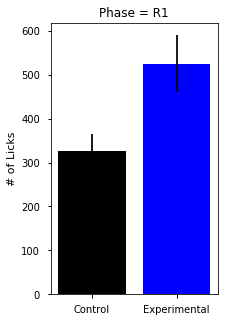

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,R2,Control,9,4.193,0.123,False
1,R2,Experimental,13,0.325,0.850,False
2,R2,Equal Variance,all,1.730,0.203,False


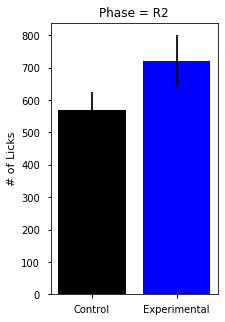

In [42]:
RESULTS = {}
for phase in phases:
    res_df = test_assumptions(data,phase)
    
    display(res_df)
    plt.show()
    

In [44]:
df_means

,Mouse_ID,Group,BL,S,PS,R1,R2
0,1,Control,697.00,703.50,645.25,289.50,578.75
1,2,Control,781.00,808.75,655.75,356.75,803.25
2,3,Control,658.25,788.00,864.50,443.75,686.00
3,4,Control,863.50,671.50,704.25,402.25,663.25
4,5,Experimental,576.25,605.50,603.00,619.75,715.75
5,6,Experimental,639.25,513.25,618.50,808.75,817.50
6,7,Experimental,795.75,815.25,645.75,588.00,867.00
7,8,Experimental,559.50,524.00,525.25,106.00,190.00
8,9,Experimental,706.25,695.50,547.75,268.75,510.25
9,10,Experimental,806.50,913.75,890.00,640.75,694.00


## RM ANOVA Melting DF

In [45]:
df

,Mouse_ID,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
0,1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,5,Experimental,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
5,6,Experimental,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
6,7,Experimental,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
7,8,Experimental,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
8,9,Experimental,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578
9,10,Experimental,953,988,579,706,1106,812,902,835,829,801,1011,919,274,559,840,890,724,793,559,700


In [46]:
## MELTING THE DATA INTO FORM WORKABLE FOR PLOTS/ANALYSIS
df2= pd.melt(df,id_vars=['Mouse_ID','Group'],
              value_name='Licks',var_name='Day')
df2

,Mouse_ID,Group,Day,Licks
0,1,Control,BL1,665
1,2,Control,BL1,859
2,3,Control,BL1,589
3,4,Control,BL1,939
4,5,Experimental,BL1,710
...,...,...,...,...
435,18,Experimental,R2_4,880
436,19,Experimental,R2_4,1047
437,20,Experimental,R2_4,293
438,21,Experimental,R2_4,900


In [48]:
phase_dict

{'BL1': 'BL',
 'BL2': 'BL',
 'BL3': 'BL',
 'BL4': 'BL',
 'S1': 'S',
 'S2': 'S',
 'S3': 'S',
 'S4': 'S',
 'PS1': 'PS',
 'PS2': 'PS',
 'PS3': 'PS',
 'PS4': 'PS',
 'R1_1': 'R1',
 'R1_2': 'R1',
 'R1_3': 'R1',
 'R1_4': 'R1',
 'R2_1': 'R2',
 'R2_2': 'R2',
 'R2_3': 'R2',
 'R2_4': 'R2'}

In [49]:
## Mapping Phase from Phase Dict
df2['Phase'] = df2['Day'].map(phase_dict)

## Getting Day of Phase
df2['Day_of_Phase'] = df2['Day'].apply(lambda x: x[-1])
# df2 = df2.dropna(subset=['Phase'])
df2

,Mouse_ID,Group,Day,Licks,Phase,Day_of_Phase
0,1,Control,BL1,665,BL,1
1,2,Control,BL1,859,BL,1
2,3,Control,BL1,589,BL,1
3,4,Control,BL1,939,BL,1
4,5,Experimental,BL1,710,BL,1
...,...,...,...,...,...,...
435,18,Experimental,R2_4,880,R2,4
436,19,Experimental,R2_4,1047,R2,4
437,20,Experimental,R2_4,293,R2,4
438,21,Experimental,R2_4,900,R2,4


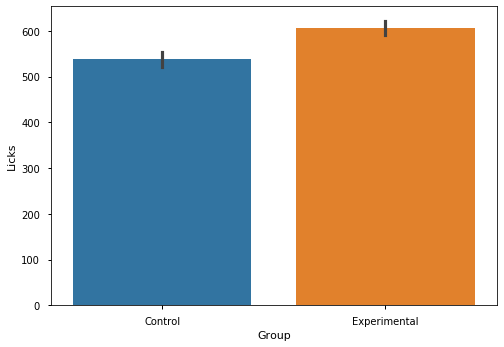

In [53]:
sns.barplot('Group','Licks',data=df2,ci=68)

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [55]:
df2.columns

Index(['Mouse_ID', 'Group', 'Day', 'Licks', 'Phase', 'Day_of_Phase'], dtype='object')

In [68]:
formula = "Licks~C(Group)*C(Phase)"#'S ~ C(E) + C(M) + X'
lm = ols(formula, df2).fit()

In [69]:
table = sm.stats.anova_lm(lm, typ=2)
display(table)

,sum_sq,df,F,PR(>F)
C(Group),4.951e+05,1.0,9.240,2.512e-03
C(Phase),2.254e+06,4.0,10.516,3.892e-08
C(Group):C(Phase),9.140e+05,4.0,4.264,2.147e-03
Residual,2.304e+07,430.0,NaN,NaN


In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pairwise_tukeyhsd()

In [63]:
res = pairwise_tukeyhsd(df2['Licks'],df2['Phase'])
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BL,PS,-14.1705,0.9,-112.0762,83.7353,False
BL,R1,-159.6705,0.001,-257.5762,-61.7647,True
BL,R2,55.4432,0.5256,-42.4626,153.3489,False
BL,S,-8.75,0.9,-106.6557,89.1557,False
PS,R1,-145.5,0.001,-243.4057,-47.5943,True
PS,R2,69.6136,0.2939,-28.2921,167.5194,False
PS,S,5.4205,0.9,-92.4853,103.3262,False
R1,R2,215.1136,0.001,117.2079,313.0194,True
R1,S,150.9205,0.001,53.0147,248.8262,True
R2,S,-64.1932,0.3782,-162.0989,33.7126,False


In [71]:
control_df =df2.groupby('Group').get_group('Control')
exp_df = df2.groupby('Group').get_group('Experimental')

res = pairwise_tukeyhsd(control_df['Licks'],control_df['Phase'])
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BL,PS,-59.8889,0.6804,-189.021,69.2433,False
BL,R1,-309.1667,0.001,-438.2988,-180.0345,True
BL,R2,-64.5,0.6249,-193.6322,64.6322,False
BL,S,-52.0556,0.7748,-181.1877,77.0766,False
PS,R1,-249.2778,0.001,-378.4099,-120.1456,True
PS,R2,-4.6111,0.9,-133.7433,124.521,False
PS,S,7.8333,0.9,-121.2988,136.9655,False
R1,R2,244.6667,0.001,115.5345,373.7988,True
R1,S,257.1111,0.001,127.979,386.2433,True
R2,S,12.4444,0.9,-116.6877,141.5766,False


In [72]:

res = pairwise_tukeyhsd(exp_df['Licks'],exp_df['Phase'])
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BL,PS,17.4808,0.9,-118.0279,152.9894,False
BL,R1,-56.1731,0.7591,-191.6817,79.3356,False
BL,R2,138.4808,0.0425,2.9721,273.9894,True
BL,S,21.2308,0.9,-114.2779,156.7394,False
PS,R1,-73.6538,0.5588,-209.1625,61.8548,False
PS,R2,121.0,0.1049,-14.5086,256.5086,False
PS,S,3.75,0.9,-131.7586,139.2586,False
R1,R2,194.6538,0.001,59.1452,330.1625,True
R1,S,77.4038,0.5158,-58.1048,212.9125,False
R2,S,-117.25,0.125,-252.7586,18.2586,False


In [ ]:
# df2.to_csv('../Neuroscience/mouse_drinking_data_melted.csv',index=False)

In [ ]:
# pd.read_csv('../Neuroscience/mouse_drinking_data_melted.csv')

# 📕 TO DO (06/30/20): RM_ANOVA

> ## Main Resources
- https://www.marsja.se/repeated-measures-anova-in-python-using-statsmodels/

> ### Additional Resources
- https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/
- https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [65]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df_melt = pd.read_csv('../Neuroscience/mouse_drinking_data_melted.csv')
df_melt

In [ ]:
del df2
# del df_melt

In [64]:
df3 = df.pivot_table(values='Licks',index=['Group','Mouse_ID'],
                      columns=['Phase','Day_of_Phase'])
df3

KeyError: 'Licks'

In [ ]:
# df.groupby(['Group','Mouse_ID'])['Mouse_ID'].count()#.max()

### NOTES (06/29/30)

- There are 52 observations for ChR2, but only 36 for Control.
    - This is probably why RMANOVA returns an error
    
- Possible Solutions:
    - Remove mice from ChR2 group to match Control
    - Resample from Control Group to match ChR2

In [ ]:
data = {}
for grp in df.groupby('Group').groups:
    data[grp] = df.groupby('Group').get_group(grp)
    print(grp)
    print(len(data[grp]['Mouse_ID'].unique()))
    print()

In [ ]:
n_to_match = 13

### Identifying which Mice to Remove (outliers)

In [ ]:
# ## Making df that can be used with plotly express
# plotly_df = df2.copy()
# # plotly_df['Day_of_Phase'] = plotly_df['Day'].apply(lambda x: x[-1])
# plotly_df

In [ ]:
import plotly.express as px
px.box(df,x='Phase',y='Licks',
       color='Group',hover_name='Mouse_ID',height=400)#,
#       category_orders=['BL','S','PS','R1','R2'])#,points='suspectedoutliers')

> - Mice to Remove (try normalized first):
    - ChR2:
        - 20
    - Control:
        - 

In [ ]:
df_anova_phases = df.pivot_table(index=['Group','Mouse_ID'],values='Licks',columns=['Phase'])
display(df_anova_phases)

In [ ]:
df

### Equalizing N's|

In [ ]:
n_chr2 = len(df_anova_phases.loc['ChR2'])
n_control= len(df_anova_phases.loc['Control'])
n_to_match = max( n_chr2,n_control)

In [ ]:
df

In [ ]:
## Resample dfa


df_list = []
# df_anova_phases.reset_index(inplace=True)
for group in df["Group"].unique():
    grp_df = df.groupby('Group').get_group(group)
    grp_df = grp_df.sample(n=n_to_match,replace=True,random_state=123)
    df_list.append(grp_df)
df


In [ ]:
from statsmodels.stats.anova import AnovaRM
df_resamp = pd.concat(df_list)
df_resamp

In [ ]:
import plotly.express as px
px.box(df_resamp,x='Phase',y='Licks',
       color='Group',hover_name='Mouse_ID',height=400)#,
#       category_orders=['BL','S','PS','R1','R2'])#,points='suspectedoutliers')

In [ ]:
# n_to_match = df2_eq

In [ ]:
# grp_dict = df_anova_phases.groupby('Group').groups

# ## Match the largest number of subjects
# n_to_match = max(list(map(lambda x: len(x),grp_dict.values())))
# n_to_match

In [ ]:
# df_list = []
# for group in df_anova_phases["Group"].unique():
#     grp_df = df_anova_phases.groupby('Group').get_group(group)
#     grp_df = grp_df.sample(n=n_to_match,replace=True)
#     df_list.append(grp_df)

In [ ]:
# df_anova_equal = pd.concat(df_list)
# df_anova_equal

### RM ANOVA

In [ ]:
df

In [ ]:
# # df2.pivot_table(index=['Group','Mouse_ID'],columns=['Day'])
# df_resamp.reset_index(drop=True,inplace=True)#.pivot_table(index=['Group','Day_of_Phase','Mouse_ID'])#,columns=['Day'])
# df_resamp

In [ ]:
# df_resamp['Phase'].value_counts()

In [ ]:
aovrm = AnovaRM(df, 'Licks', 'Mouse_ID', within=['Phase','Group'],aggregate_func=np.nanmean).fit()
aovrm.summary()

In [ ]:
df2.isna().sum()

In [ ]:
import statsmodels
statsmodels.__version__

In [ ]:
anovarm = AnovaRM(df2,'Licks','Mouse_ID',within=['Day'],
                 aggregate_func='mean')#between=['Group'],
res = anovarm.fit()
print(res)

# APPENDIX

### Writing functions to test assumptions

In [ ]:
import scipy.stats as stats
stats.normaltest(grp_control['BL'])

In [ ]:
def test_normality(grp_control,col='BL',alpha=0.05):
    import scipy.stats as stats
    stat,p =stats.normaltest(grp_control[col])
    if p<alpha:
        print(f"Normal test p value of {np.round(p,3)} is < {alpha}, therefore data is NOT normal.")
    else:
        print(f"Normal test p value of {np.round(p,3)} is > {alpha}, therefore data IS normal.")
    return p

def test_equal_variance(grp1,grp2, alpha=.05):
    stat,p = stats.levene(grp1,grp2)
    if p<alpha:
        print(f"Levene's test p value of {np.round(p,3)} is < {alpha}, therefore groups do NOT have equal variance.")
    else:
        print(f"Normal test p value of {np.round(p,3)} is > {alpha},  therefore groups DOES have equal variance.")
    return p



# def test_assumptions(*args, normal=True,equal_var=True):
#     pass

In [ ]:
test_normality(grp_control,col='S'), test_normality(grp_exp,col='S');

In [ ]:
def Cohen_d(group1, group2):
    """
    Compute Cohen's d.
    
    Args:
        group1: Series or NumPy array
        group2: Series or NumPy array

    Returns:
        d (float): effect size statistic

    Interpretation:
    > Small effect = 0.2
    > Medium Effect = 0.5
    > Large Effect = 0.8
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [ ]:
def plot_statplot(df_means,grps=None,
                  group_col='Group',data_col='BL'):
    
    if grps is None:
        grps = df_means.groupby(group_col).groups

    ## Examine KDEs for BL
    fig= plt.figure(figsize=(10,6))
    axes=['','']
    # Define gridspec to create grid coordinates             
    gs = fig.add_gridspec(nrows=1,ncols=9)
    axes[0] = fig.add_subplot(gs[0,0:7])
    axes[1] = fig.add_subplot(gs[0,7:])

    data1=df_means.loc[grps['ChR2'],data_col]
    data2=df_means.loc[grps['Control'],data_col]
    
    group1 = {'name':'ChR2',
             'data':data1,#df_means.loc[grps['ChR2'],data_col],
             'n':len(data1)}
    plot1 = {'hist_kws':dict(color='blue',lw=2, ls='-')}#,bins='auto')}

    group2 = {'name':'Control',
             'data':data2,#df_means.loc[grps['Control'],data_col],
             'n':len(data2)}
    plot2 = {'hist_kws':dict(color='orange',lw=2, ls='-')}#,bins='auto')}
    
    ax = axes[0]
    label1= f"{group1['name']} n={group1['n']}"
    sns.distplot(group1['data'], label=label1,
                 ax=ax, hist_kws=plot1['hist_kws'])
    # ax.legend()

    label2= f"{group2['name']} n={group2['n']}"
    sns.distplot(group2['data'], label=label2,
                 ax=ax,hist_kws=plot2['hist_kws'])
    ax.legend()

    

    ax.axvline(group1['data'].mean(),color=plot1['hist_kws']['color'], ls='--')
    ax.axvline(group2['data'].mean(),color=plot2['hist_kws']['color'], ls='--')


    ax = axes[1]

    ax.bar(group1['name'],group1['data'].mean(),
          yerr=sem(group1['data']))

    ax.bar(group2['name'],group2['data'].mean(),
          yerr=sem(group2['data']))
    
    plt.suptitle(f"Phase = {data_col}",fontsize=20)
    
    return fig, ax

In [ ]:
def test_assumptions(df_means,grps=None,
                     group_col='Group',
                     grp1='ChR2',
                     grp2='Control',
                     data_col='BL',
                    plot_data=False):
    """MASSIVE FUNCTION PASTED IN DUE TO VERY LATE STUDY GROUP
    WE WILL CONSTRUCT A BETTER/SIMPLER VERSION OF THIS TOGETHER IN NEXT STUDY GROUP."""
    
    if grps is None:
        grps = df_means.groupby(group_col).groups
        
        
    group1 = {'name':grp1,
              'data':df_means.loc[grps[grp1],data_col]}
    
    group2 = {'name':grp2,
              'data':df_means.loc[grps[grp2],data_col]}
    
    results = [['Col','Test','Group(s)','Stat','p','p<.05']]
    
    ## Normality testing
    stat,p = stats.normaltest(group1['data'])
    results.append([data_col,'Normality',group1['name'],
                  stat, p, p<.05])
    
    stat,p = stats.normaltest(group2['data'])    
    results.append([data_col,'Normality',group2['name'],
                  stat, p, p<.05])
    ## Homo. of Variance Testing
    stat,p = stats.levene(group1['data'],group2['data'])
    results.append([data_col,'Equal Variance','Both',
                  stat, p, p<.05])
    
    
    ## Parametric T-Test
    stat,p = stats.ttest_ind(group1['data'],group2['data'])
    results.append([data_col,'T-Test 2samp','Both',stat,p,p<.05])
    
    ## Non-Parametric MWU
    stat,p = stats.mannwhitneyu(group1['data'],group2['data'])
    results.append([data_col,'Mann Whitney U','Both',stat,p,p<.05])
    
    ## Effect size with Cohen's d
    d = Cohen_d(group1['data'],group2['data'])
    results.append([data_col, "Cohen's d", 'Both','','',d])
    
#     if plot_data:
#         plot_dists(grp, col=data_col)
    
    return pd.DataFrame(results[1:],columns=results[0])

res = test_assumptions(df_means)


In [ ]:
for phase in ['BL','S','PS','R']:
    print('---'*30)

    res = test_assumptions(df_means,data_col=phase)
    display(res)
    
    fig,ax = plot_statplot(df_means, data_col=phase)
    plt.show()

# fig,ax = plot_dists(grp_control,grp_exp,col='R',name1='ChR2 Mice', name2='Control Mice')


## CONCLUSION
- Running the correct test according to the assumptions of normality and equal variance will ensure you can get the correct test result.

- Notice how the last phase (R) did NOT come back as significant when we ran the t-test, but DID come back significant when we performed the Mann Whitney U instead. 



(https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

## Effect Size Visual
- https://rpsychologist.com/d3/NHST/


## Ephys Figure
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_fig1.png">

## Statistical Analysis Pipeline

1. **Test for Normality**
    - D'Agostino-Pearson's normality test<br>
    ```scipy.stats.normaltest```
    - Shapiro-Wilik Test<br>
    ```scipy.stats.shapiro```<br>
    
    
2. **Test for Homogeneity of Variance**

    - Levene's Test<br>
    ```scipy.stats.levene```


3. **Choose appropriate test based upon 1. and 2.** <br> 
    - T Test (1-sample)
        - `stats.ttest_1samp()`
    - T Test (2-sample)
        - `stats.ttest_ind()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
    - Welch's T-Test (2-sample)
        - `stats.ttest_ind(equal_var=False)`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
        
    - Mann Whitney U
        - `stats.mannwhitneyu()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
    - ANOVA 
        - `stats.f_oneway()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
    - Tukey's
     - `statsmodels.stats.multicomp.pairwise_tukeyhsd`
     -[docs](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
    

4. **Calculate effect size for significant results.**
    - Effect size: [cohen's d](https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python)
    - Interpretation:
        - Small effect = 0.2 ( cannot be seen by naked eye)
        - Medium effect  = 0.5
        - Large Effect = 0.8 (can be seen by naked eye)
        
5. **If significant, follow up with post-hoc tests (if have more than 2 groups)**
    - [Tukey's](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)


In [ ]:
# def test_assumptions(df_means,grps=None,
#                      group_col='Group',
#                      grp1='ChR2',
#                      grp2='Control',
#                      data_col='BL'):
    
#     if grps is None:
#         grps = df_means.groupby(group_col).groups
        
        
#     group1 = {'name':grp1,
#               'data':df_means.loc[grps[grp1],data_col]}
    
#     group2 = {'name':grp2,
#               'data':df_means.loc[grps[grp2],data_col]}
    
#     results = [['Col','Test','Group(s)','Stat','p','p<.05']]
    
#     ## Normality testing
#     stat,p = stats.normaltest(group1['data'])
#     results.append([data_col,'Normality',group1['name'],
#                   stat, p, p<.05])
    
#     stat,p = stats.normaltest(group2['data'])    
#     results.append([data_col,'Normality',group2['name'],
#                   stat, p, p<.05])
#     ## Homo. of Variance Testing
#     stat,p = stats.levene(group1['data'],group2['data'])
#     results.append([data_col,'Equal Variance','Both',
#                   stat, p, p<.05])
    
#     ## Parametric T-Test
#     stat,p = stats.ttest_ind(group1['data'],group2['data'])
#     results.append([data_col,'T-Test 2samp','Both',stat,p,p<.05])
    
#     ## Non-Parametric MWU
#     stat,p = stats.mannwhitneyu(group1['data'],group2['data'])
#     results.append([data_col,'Mann Whitney U','Both',stat,p,p<.05])
    
#     ## Effect size with Cohen's d
#     d = Cohen_d(group1['data'],group2['data'])
#     results.append([data_col, "Cohen's d", 'Both','','',d])
    
#     return pd.DataFrame(results[1:],columns=results[0])

# test_assumptions(df_means)